In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro

import yfinance as yf
import pandas_datareader.data as pdr

In [9]:
tech_list = ['AAPL']

yf.pdr_override()

start_date = '1-1-2016'
end_date = '1-1-2022'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = pdr.get_data_yahoo('AAPL', data_source='yahoo', start=start, end=end)
    
company_list = [AAPL]
company_name = ["APPLE"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df1 = pd.concat(company_list, axis=0)
df1 = df1.drop('company_name', 1)
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.251436,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.643711,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.181007,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.202665,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.320072,283192000
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005,62348900


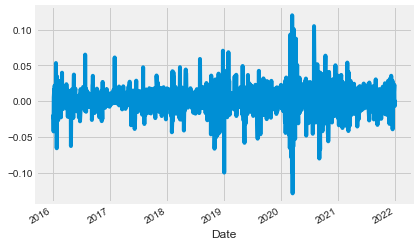

In [10]:
df1['Returns'] = df1['Adj Close'].pct_change()
df1['Returns'].plot()
plt.show()

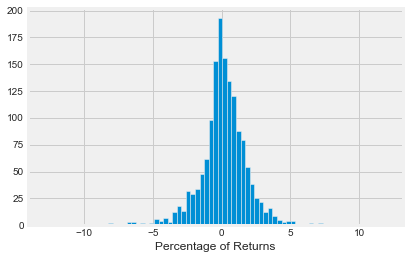

In [11]:
returns_percent = df1['Returns'] * 100
returns_percent.dropna(inplace=True)

plt.hist(returns_percent, bins=75)
plt.xlabel("Percentage of Returns")
plt.show()

In [12]:
daily_mean_returns = np.mean(df1['Returns'])
print("Daily Mean Returns: " + str(daily_mean_returns))

annual_mean_returns = ((1+ daily_mean_returns)**252)-1
print("Annual Mean Returns: " + str(annual_mean_returns))

Daily Mean Returns: 0.0014907537660482698
Annual Mean Returns: 0.4555592795358401


In [13]:
daily_std = np.std(df1['Returns'])
annual_std = daily_std*np.sqrt(252)
print("Daily Standard Deviation " + str(daily_std))
print("Annual Standard Deviation " + str(annual_std ))

print('\n')

daily_var= daily_std**2
annual_var = annual_std**2
print("Daily Variance " + str(daily_var))
print("Annual Variance " + str(annual_var))

Daily Standard Deviation 0.018503613387958466
Annual Standard Deviation 0.29373575628374055


Daily Variance 0.00034238370841103576
Annual Variance 0.08628069451958102


In [14]:
returns = df1['Returns'].dropna()
skewness = skew(returns)
print("Skewness: " + str(skewness))

Skewness: -0.09749356097948124


In [15]:
excess_kurtosis = kurtosis(returns)
print("Excess kurtosis: " + str(excess_kurtosis))

real_kurtosis = excess_kurtosis + 3
print("Real kurtosis: " + str(real_kurtosis))

Excess kurtosis: 6.723091211300526
Real kurtosis: 9.723091211300526
